<img src="https://www.peoplecert.org/-/media/peoplecert/images/tc-images/peoplelogy-skill/peopleogy-logo.png?h=966&iar=0&w=2231&hash=28DD04BA69030200BD7ADEA1370449B3" style="float: left; margin: 20px; height: 55px">

# Time Series Analysis (Modelling)

_Author: Fahmi Roslan_

---

## Capstone Project Title : Forecasting Market Volatility for GBP/USD Using Time Series

---

### Data Processing Process
 
- Importing data.  
- Drop and remove unnecessary columns and rows .
- Concoatig date and time.
- Converting object and sorting index.


In [2]:
!pip3 install scipy statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv('GBPUSD.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2000.01.03,1.6146,1.6400,1.6138,1.6361,4444
1,2000.01.04,1.6359,1.6415,1.6310,1.6373,6141
2,2000.01.05,1.6376,1.6450,1.6354,1.6419,6504
3,2000.01.06,1.6421,1.6511,1.6411,1.6470,6473
4,2000.01.07,1.6476,1.6499,1.6360,1.6394,4754


In [6]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Set Date to be in the index
df.set_index('Date', inplace=True)

In [8]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### Checking for Stationarity: the Augmented Dickey-Fuller Test

The [augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) is a hypothesis test that tests for stationarity. We assume that our data are not stationary. With enough evidence, we may accept that our data are stationary.

Specifically, the test is as follows:

$$
\begin{eqnarray}
&H_0:& \text{not stationary} \\
&H_A:& \text{stationary}
\end{eqnarray}
$$

In [9]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original (non-differenced!) data.

adfuller(df['Volume'])

(-2.943655895014861,
 0.0405018542219686,
 34,
 6044,
 {'1%': -3.4314324089136767,
  '5%': -2.8620183258811283,
  '10%': -2.567024610317412},
 137339.01168246148)

In [10]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original (non-differenced!) data.

# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original (non-differenced!) data.

adfuller(df['Volume'])

(-2.943655895014861,
 0.0405018542219686,
 34,
 6044,
 {'1%': -3.4314324089136767,
  '5%': -2.8620183258811283,
  '10%': -2.567024610317412},
 137339.01168246148)

In [11]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [12]:
# Run ADF test on original (non-differenced!) data.
# Run ADF test on original (non-differenced!) data.

interpret_dftest(adfuller(df['Volume']))

Test Statistic   -2.943656
p-value           0.040502
dtype: float64

In [13]:
# Create train-test split.
y_train, y_test = train_test_split(df['Volume'], test_size=.1, shuffle=False)

In [14]:
# Import ARIMA model.
from statsmodels.tsa.arima.model import ARIMA

## Manual GridSearch

Our strategy is this:
- Let's start AIC at some really, really big number and call it `best_aic`.
- Create variables `best_p` and `best_q` to store our best values of $p$ and $q$.
- Create a nested `for` loop to iterate over our possible values of $p$ and $q$.
    - At every combination of $p$ and $q$, fit an ARIMA model.
    - If the ARIMA model has a better (lower) AIC than `best_aic`, then let's overwrite `best_aic`, `best_p`, and `best_q` with the values of AIC, $p$, and $q$ that our better model is using!
    - If the ARIMA model has a worse (higher) AIC than `best_aic`, do nothing.
- At the end of the `for` loop, tell us which values of $p$ and $q$ give us the best model (lowest AIC).

<details><summary>What should our main concerns be about a manual GridSearch process?</summary>

- The amount of time it takes to fit our models!
- Cross-validation is also more complicated with time series data; you can check out more [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) and [here](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/).
</details>

<details><summary>What should our main concerns be about a manual GridSearch process?</summary>

- The amount of time it takes to fit our models!
- Cross-validation is also more complicated with time series data; you can check out more [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) and [here](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/).
</details>

In [15]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting ARIMA({p}, 1, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog=y_train, order=(p, 1, q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 1, 0)
The AIC for ARIMA(0,1,0) is: 124680.17204552784
Attempting ARIMA(0, 1, 1)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

The AIC for ARIMA(0,1,1) is: 123784.16014149826
Attempting ARIMA(0, 1, 2)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(0,1,2) is: 123570.51388292658
Attempting ARIMA(0, 1, 3)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(0,1,3) is: 123564.88683947259
Attempting ARIMA(0, 1, 4)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(0,1,4) is: 123476.26046624729
Attempting ARIMA(1, 1, 0)
The AIC for ARIMA(1,1,0) is: 124271.15734149737
Attempting ARIMA(1, 1, 1)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

The AIC for ARIMA(1,1,1) is: 123594.74376072676
Attempting ARIMA(1, 1, 2)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(1,1,2) is: 123570.01160298497
Attempting ARIMA(1, 1, 3)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(1,1,3) is: 123535.33719145687
Attempting ARIMA(1, 1, 4)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(1,1,4) is: 123478.1838006416
Attempting ARIMA(2, 1, 0)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(2,1,0) is: 123924.44420999687
Attempting ARIMA(2, 1, 1)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


The AIC for ARIMA(2,1,1) is: 123543.71879390697
Attempting ARIMA(2, 1, 2)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(2,1,2) is: 123523.89503879704
Attempting ARIMA(2, 1, 3)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(2,1,3) is: 123425.84910177287
Attempting ARIMA(2, 1, 4)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(2,1,4) is: 123419.77144131622
Attempting ARIMA(3, 1, 0)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(3,1,0) is: 123450.72302873009
Attempting ARIMA(3, 1, 1)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(3,1,1) is: 123431.96348461042
Attempting ARIMA(3, 1, 2)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(3,1,2) is: 123431.64548303385
Attempting ARIMA(3, 1, 3)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(3,1,3) is: 123418.86966156881
Attempting ARIMA(3, 1, 4)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(3,1,4) is: 123380.72442972887
Attempting ARIMA(4, 1, 0)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(4,1,0) is: 123428.49276758448
Attempting ARIMA(4, 1, 1)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC for ARIMA(4,1,1) is: 123426.53153984802
Attempting ARIMA(4, 1, 2)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

The AIC for ARIMA(4,1,2) is: 123427.58189684617
Attempting ARIMA(4, 1, 3)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The AIC for ARIMA(4,1,3) is: 123317.86607230085
Attempting ARIMA(4, 1, 4)


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

The AIC for ARIMA(4,1,4) is: 123274.08814598958


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(4,1,4).
This model has an AIC of 123274.08814598958.


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Finding coefficients for an MA model is difficult, because the model requires us to regress on errors, but we don't actually observe these errors. The algorithm for fitting this is complicated and is well beyond the scope of this lesson. [Check more out here](https://www.it.uu.se/research/publications/reports/2006-022/2006-022-nc.pdf). We're using `try` and `except` statements so Python errors don't cause us to stop our model-fitting process!

The model we want to fit is an $ARIMA(4,1,4)$ model. 

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
# Instantiate best model.
arima = ARIMA(endog=y_train, order=(4, 1, 4))


# Fit ARIMA model.
model = arima.fit()

# Generate predictions based on test set.
preds = model.predict(start=y_test.index[0], end = y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'Forecast of GBPUSD Trade Volume with ARIMA(4, 1, 4) Predictions', fontsize=16)
plt.show();

C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

## Evaluate ARIMA 4,1,4

1) Using Train-Test Split:

KeyError: 'Date'

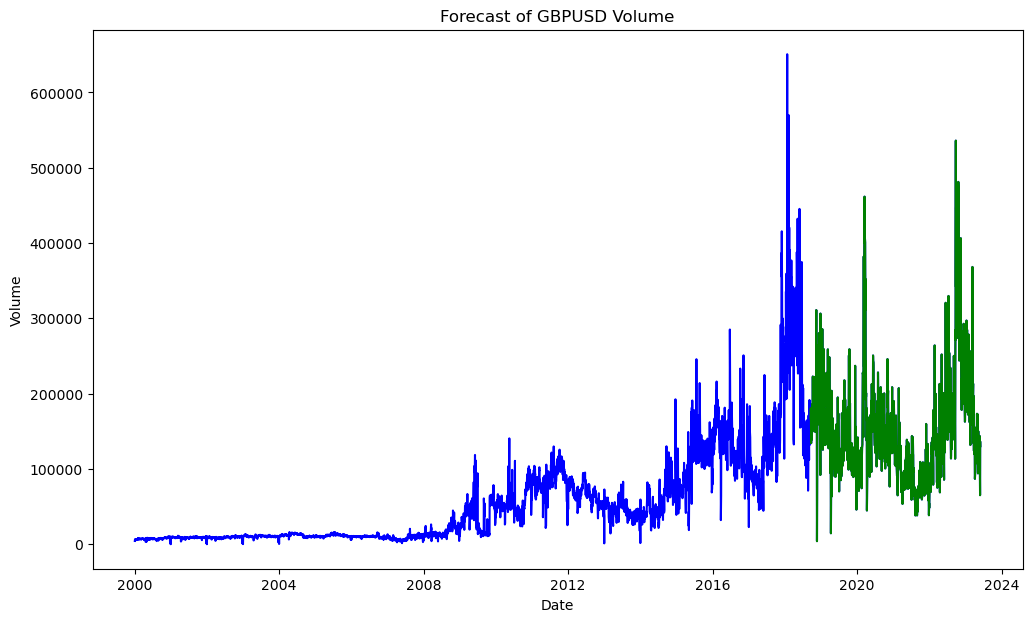

In [44]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Forecast of GBPUSD Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.plot(df['Volume'], 'blue', label='Training Data')
plt.plot(test_data['Volume'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

C:\Users\fahmi\AppData\Local\Temp\ipykernel_4128\2979445145.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Volume'], 'green', color='blue', label='Training Data')


ValueError: x and y must have same first dimension, but have shapes (1216,) and (0,)

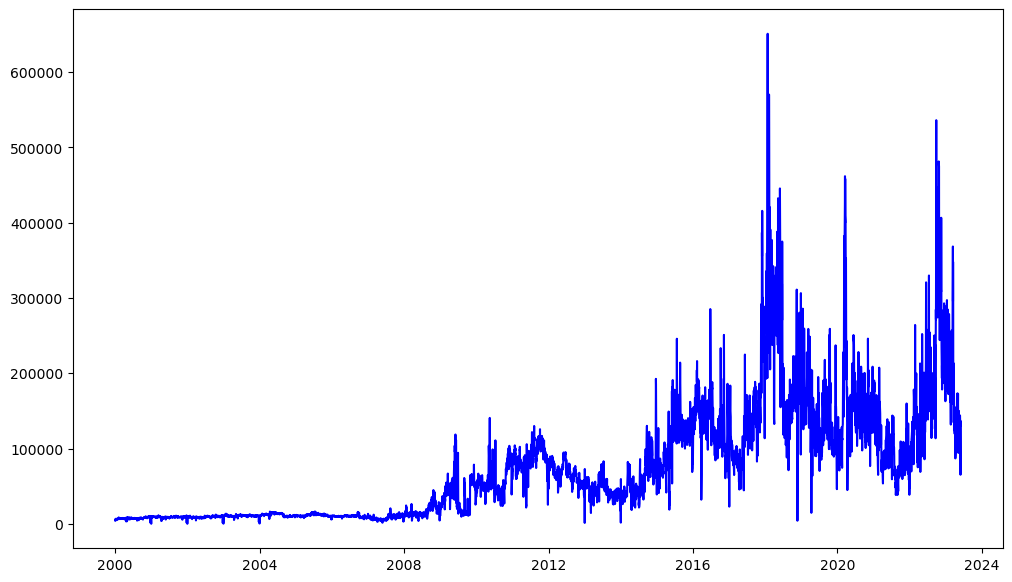

In [48]:
plt.figure(figsize=(12,7))
plt.plot(df['Volume'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Volume'], color='red', label='Actual Price')
plt.title('Forecast of GBPUSD')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [63]:
model.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_predict'

## Evaluate ARIMA 4,1,4 Accuracy Metrics


1) RMSE:
2) MAE
3) MASE
4) MAPE

In [54]:
from sklearn.metrics import mean_squared_error

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Example data
actual_values = np.array([10, 20, 30, 40, 50])  # Actual values for the period you made predictions for

# Fit ARIMA model
model = ARIMA(actual_values, order=(1, 0, 0))  # Example ARIMA model order
fit_model = model.fit()

# Make predictions
forecast = fit_model.forecast(steps=len(actual_values))  # Predictions for the same period as actual values

# Calculate squared errors
squared_errors = (actual_values - forecast)**2

# Calculate mean squared error
mse = np.mean(squared_errors)

# Calculate RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 20.73247619699088


In [64]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Example data
actual_values = np.array([10, 20, 30, 40, 50])  # Actual values for the period you made predictions for

# Fit ARIMA(4,1,4) model
model = ARIMA(actual_values, order=(4, 1, 4))  # ARIMA model order (p, d, q)
fit_model = model.fit()

# Make predictions
forecast = fit_model.forecast(steps=len(actual_values))  # Predictions for the same period as actual values

# Calculate absolute errors
absolute_errors = np.abs(actual_values - forecast)

# Calculate mean absolute error
mae = np.mean(absolute_errors)

print("MAE:", mae)

C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 49.99999601481055


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [65]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Example data
actual_values = np.array([10, 20, 30, 40, 50])  # Actual values for the period you made predictions for

# Fit ARIMA(4,1,4) model
model = ARIMA(actual_values, order=(4, 1, 4))  # ARIMA model order (p, d, q)
fit_model = model.fit()

# Make predictions
forecast = fit_model.forecast(steps=len(actual_values))  # Predictions for the same period as actual values

# Calculate absolute errors
absolute_errors = np.abs(actual_values - forecast)

# Calculate MAE
mae = np.mean(absolute_errors)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

# Example benchmark model (e.g., naive forecast)
naive_forecast = actual_values[:-1]  # Example: using the last observed value as the forecast
mape_train = np.mean(np.abs((actual_values[1:] - naive_forecast) / actual_values[1:])) * 100

# Calculate MASE
mase = mae / mape_train

print("MASE:", mase)

MASE: 1.5584414342278614


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Example data
actual_values = np.array([10, 20, 30, 40, 50])  # Actual values for the period you made predictions for

# Fit ARIMA(4,1,4) model
model = ARIMA(actual_values, order=(4, 1, 4))  # ARIMA model order (p, d, q)
fit_model = model.fit()

# Make predictions
forecast = fit_model.forecast(steps=len(actual_values))  # Predictions for the same period as actual values

# Calculate absolute percentage errors
absolute_percentage_errors = np.abs((actual_values - forecast) / actual_values)

# Calculate MAPE
mape = np.mean(absolute_percentage_errors) * 100

print("MAPE:", mape)

MAPE: 228.33332232842398


C:\Users\fahmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Interpret the residual plots in ARIMA


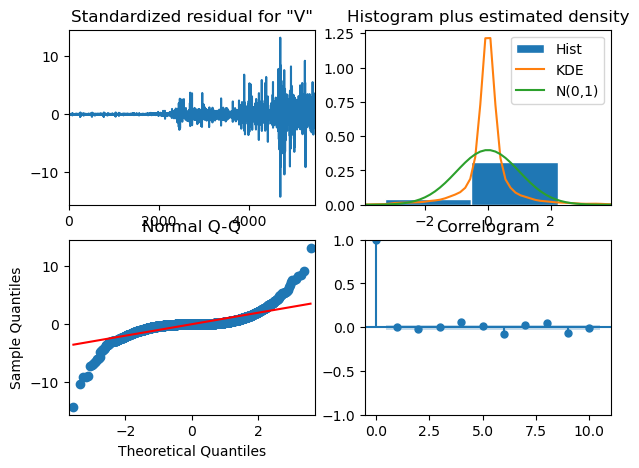

In [34]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.